<a href="https://colab.research.google.com/github/BethanyJep/Python-REFRESHER/blob/master/Clustering_with_SKlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KMeans Clustering

##The Challenge
You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. You want to understand the customers like who are the target customers so that the sense can be given to marketing team and plan the strategy accordingly.


Personal Practice: Using Kmeans create 6 clusters from below dataset
https://modkenya.com/datascience/datasets/Mall_Customers.csv


How would you explain the customers in the clusters ?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('https://modkenya.com/datascience/datasets/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


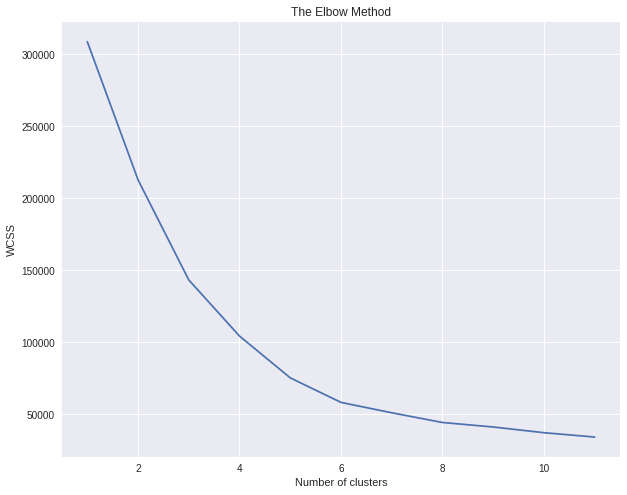

,Age,Annual Income,Speding Score
0,41.000000,109.700000,22.000000
1,25.521739,26.304348,78.565217
2,32.785714,78.035714,81.892857
3,36.307692,31.692308,36.461538
4,32.454545,108.181818,82.727273
5,24.071429,58.071429,49.714286
6,46.160000,61.320000,46.360000
7,61.444444,51.185185,50.444444
8,41.000000,80.181818,12.681818
9,49.000000,24.461538,11.076923


In [3]:
df1 = df[['Age','Annual Income','Spending Score']]
# convert subset to an array - a List
array = df1.values
array

# get the data and push it to the model for clustering
X  = array[:, 0:3]  # -1
# above the 1st full colon means - all rows

# Lets check how many clusters can we get from data
# inertia...
plt.style.use('seaborn')
plt.figure(figsize=(10, 8))

# visualization
wcss = []
for i in range(1, 12):
     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 30)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)
plt.plot(range(1, 12), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


#model data

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)


#  Clustering
mean = kmeans.cluster_centers_

# convert above mean back dataframe
cluster = pd.DataFrame(mean, columns=['Age','Annual Income','Speding Score'])
cluster

In [4]:
# classify members in a cluster
df1['label'] =  kmeans.labels_

df1 = df1[df1['label'] == 9]
df1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Annual Income,Spending Score,label
2,20,16,6,9
6,35,18,6,9
8,64,19,3,9
10,67,19,14,9
12,58,20,15,9
14,37,20,13,9
18,52,23,29,9
22,46,25,5,9
24,54,28,14,9
30,60,30,4,9
